####Importing necessary libraries

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

####1. (a) Data Analysis and Visualization

In [ ]:
from tensorflow.keras.datasets import mnist
data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
all_data = np.concatenate((data[0][0], data[1][0]), axis=0)
all_label = np.concatenate((data[0][1], data[1][1]), axis=0)

In [ ]:
train_data = data[0][0]
train_label = data[0][1]

test_data = data[1][0]
test_label = data[1][1]

In [ ]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)
print(all_data.shape)
print(all_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(70000, 28, 28)
(70000,)


Displaying 5 random images from the MNIST data set

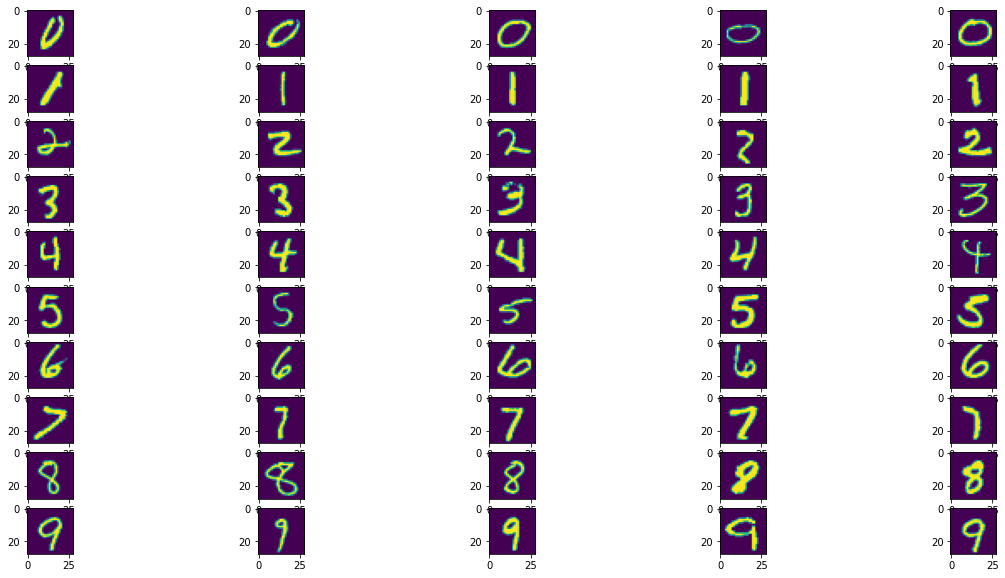

In [ ]:
fig = plt.figure(figsize=(20, 10))
count = 1
for i in range(1, 51):
    if(i%5==0):
        fig.add_subplot(10, 5, i)
        idx = np.where(all_label==count-1)
        idx_c = random.choice(idx[0])
        count+=1

    else:
        fig.add_subplot(10, 5, i)
        idx = np.where(all_label==count-1)
        idx_c = random.choice(idx[0])

    plt.imshow(all_data[idx_c])

# plt.suptitle("Choosing 5 random images from the MNIST data set")
# plt.show()

In [ ]:
flag = 0
dim_img = all_data[0].shape
for i in range(1, 70000):
    if(all_data[i].shape != dim_img):
        flag = 1

if(flag==0):
    print("Size of image is equal")
    print("Size of image is: ", dim_img)

Size of image is equal
Size of image is:  (28, 28)


In [ ]:
count_per_class = []
for i in range(10):
    count_per_class.append(len(np.where(all_label==i)[0]))
print(count_per_class)

[6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]


In [ ]:
data = {"Class Name": [],
        "Class Size": []}
data["Class Name"] = np.arange(0, 10)
data["Class Size"] = count_per_class

df = pd.DataFrame(data)
df.head()

,Class Name,Class Size
0,0,6903
1,1,7877
2,2,6990
3,3,7141
4,4,6824


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


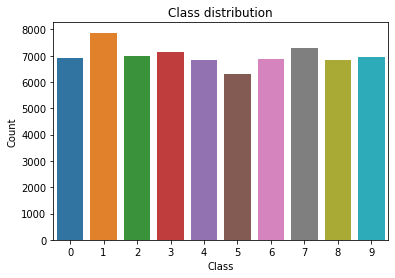

In [ ]:
sns.countplot(all_label).set_title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
max_val = np.uint8(np.max(all_data))
train_data_normalised = all_data.astype('float32') / max_val

####1 (b) Air Quality Data in India (2015 - 2020)

In [ ]:
!wget https://raw.githubusercontent.com/adityarc19/aqi-india/main/city_day.csv

--2023-02-09 06:30:13--  https://raw.githubusercontent.com/adityarc19/aqi-india/main/city_day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2574056 (2.5M) [text/plain]
Saving to: ‘city_day.csv’

city_day.csv        100%[===================>]   2.45M  --.-KB/s    in 0.02s   

2023-02-09 06:30:13 (161 MB/s) - ‘city_day.csv’ saved [2574056/2574056]



In [ ]:
df_AQI = pd.read_csv('city_day.csv')
df_AQI

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df_AQI['Year'] = pd.DatetimeIndex(df_AQI['Date']).year              # Adding an addition column year using DatetimeIndex fn from pd library
df_AQI = df_AQI[(df_AQI['Year']>= 2015) & (df_AQI['Year']< 2019)]   # Since I am doing BTech, 4 year data is being taken from 2015-2018
df_AQI

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28978,Visakhapatnam,2018-12-27,111.24,195.18,31.43,79.61,67.90,13.77,0.92,19.05,119.87,5.19,9.34,4.13,276.0,Poor,2018
28979,Visakhapatnam,2018-12-28,100.63,179.35,10.12,58.23,39.29,14.99,0.73,12.57,115.35,4.04,8.29,2.40,255.0,Poor,2018
28980,Visakhapatnam,2018-12-29,77.43,137.85,3.76,40.68,24.69,14.13,0.65,17.41,104.11,3.44,5.75,1.69,220.0,Poor,2018
28981,Visakhapatnam,2018-12-30,70.20,116.50,2.04,21.96,13.33,12.90,0.47,17.86,99.99,2.53,7.21,0.77,152.0,Moderate,2018


EDA on AQI data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

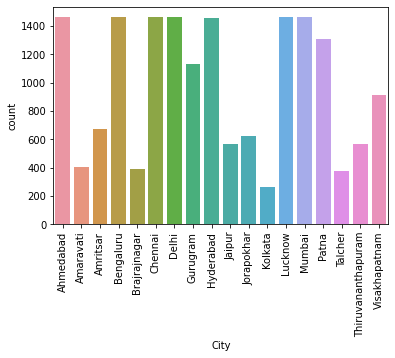

In [ ]:
sns.countplot(df_AQI['City'])
plt.xticks(rotation=90)

In [ ]:
df_AQI.hist(figsize=(20,10), color = "lightgreen", ec="black")

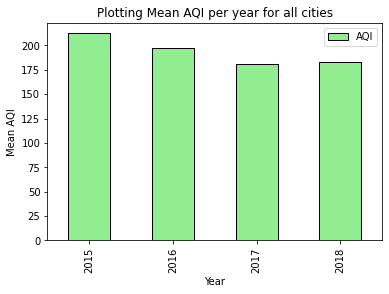

In [ ]:
grouped_data = df_AQI.groupby(['Year'])['AQI'].mean().reset_index()
grouped_data.plot(kind='bar', x='Year', y='AQI', color = "lightgreen", ec="black")
plt.title('Plotting Mean AQI per year for all cities')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.show()

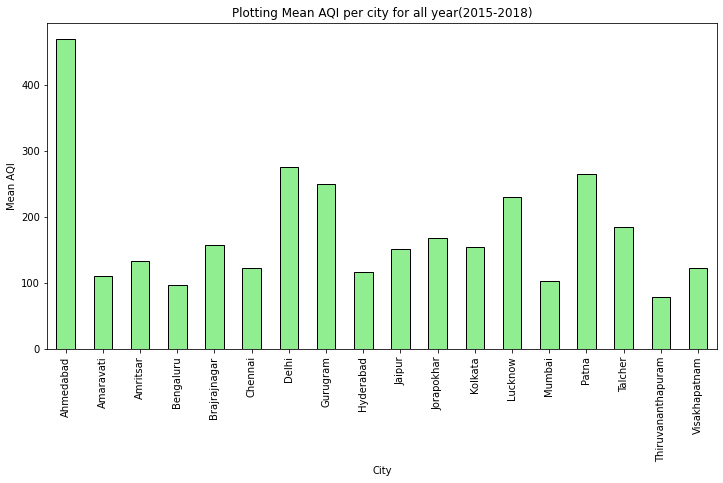

In [ ]:
grouped_data_2 = df_AQI.groupby(['City'])['AQI'].mean()
plt.figure(figsize=(12, 6))
grouped_data_2.plot(kind='bar', x='City', y='AQI', color = "lightgreen", ec="black")
plt.title('Plotting Mean AQI per city for all year(2015-2018)')
plt.xlabel('City')
plt.ylabel('Mean AQI')
plt.show()

In [ ]:
df_AQI.groupby('City').apply(lambda x: x.isnull().sum()).head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
City,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,621,1461,603,602,592,1461,603,603,674,450,450,450,655,655,0
Amaravati,0,0,9,8,8,8,8,8,17,11,8,28,28,148,54,54,0
Amritsar,0,0,120,53,85,36,281,34,68,58,86,187,204,205,83,83,0
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,1461,99,99,0
Brajrajnagar,0,0,125,121,116,101,116,114,105,105,106,128,390,390,120,120,0


Visualizing missing values

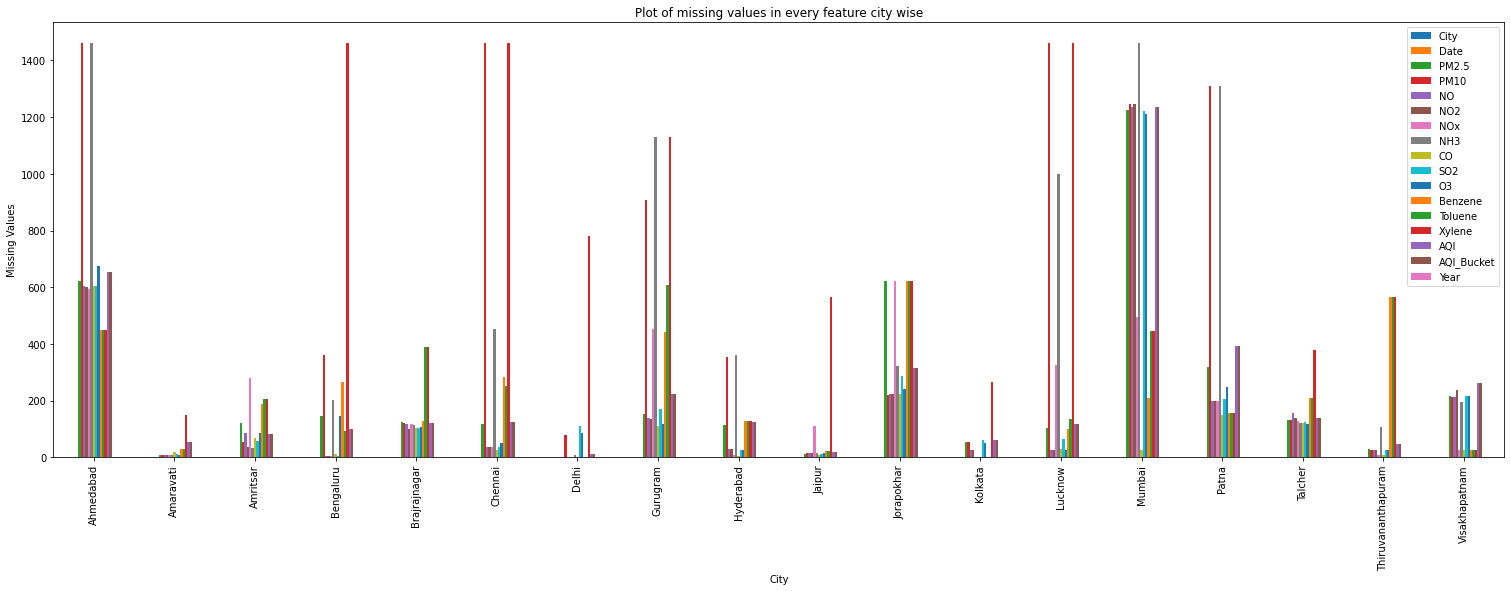

In [ ]:
missing_values_by_city = df_AQI.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_by_city.plot(kind='bar',figsize=(26,8))
plt.title('Plot of missing values in every feature city wise')
plt.xlabel('City')
plt.ylabel('Missing Values')
plt.show()

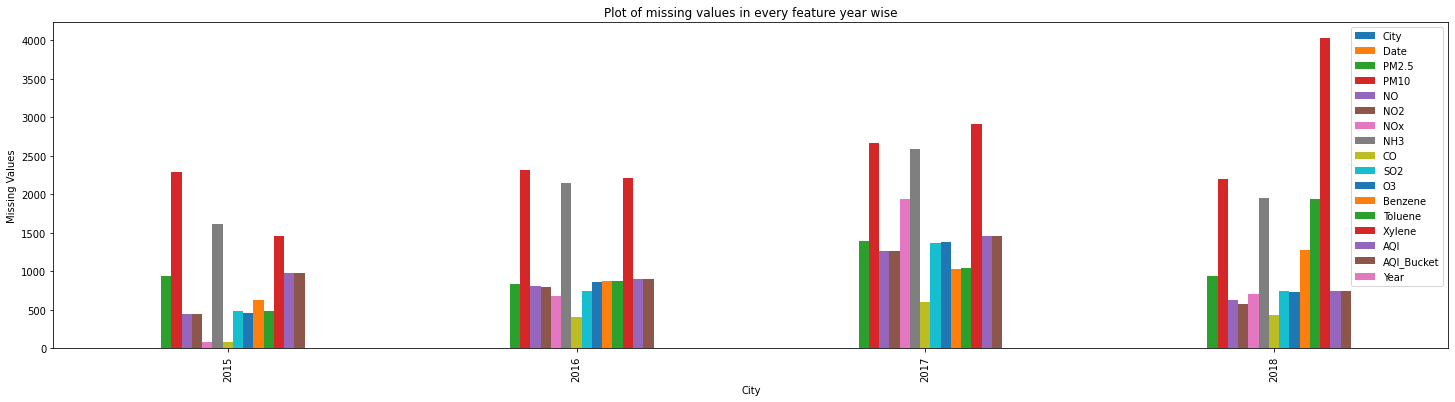

In [ ]:
df_AQI.groupby('Year').apply(lambda x: x.isnull().sum()).plot(kind='bar',figsize=(25,6))
plt.title('Plot of missing values in every feature year wise')
plt.xlabel('City')
plt.ylabel('Missing Values')
plt.show()

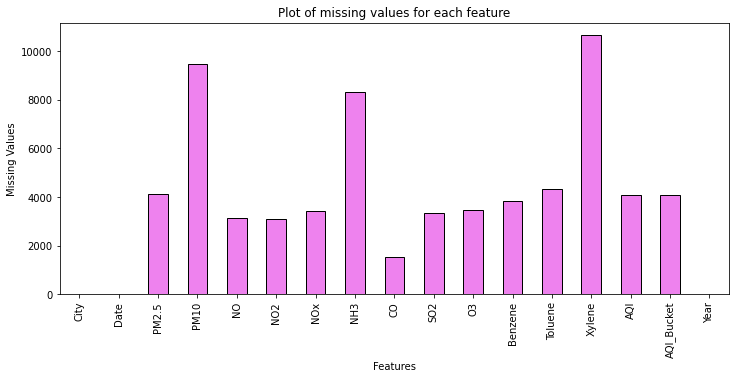

In [ ]:
# analysis for imputation
missing_values_across_features = df_AQI.apply(lambda x: x.isnull().sum())
missing_values_across_features.plot(kind='bar',figsize=(12,5), color = "violet", ec="black")
plt.title('Plot of missing values for each feature')
plt.xlabel('Features')
plt.ylabel('Missing Values')
plt.show()

In [ ]:
print(np.count_nonzero(df_AQI.isnull().sum()))

14


Since it was mentioned that the imputation task (with justification) should be performed for any one feature only I imputed only Xylene feature

In [ ]:
%%capture
df_AQI['Xylene'] = df_AQI['Xylene'].fillna(np.mean(df_AQI['Xylene']))           # imputation

<ipython-input-26-d2ee0e852308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AQI['Xylene'] = df_AQI['Xylene'].fillna(np.mean(df_AQI['Xylene']))           # imputation


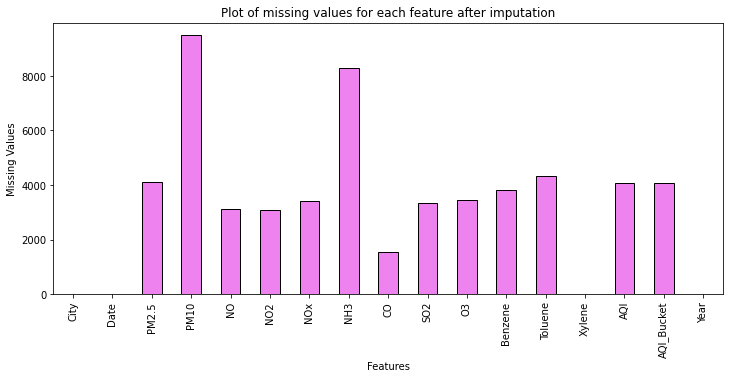

In [ ]:
missing_values_across_features = df_AQI.apply(lambda x: x.isnull().sum())
missing_values_across_features.plot(kind='bar',figsize=(12,5), color = "violet", ec="black")
plt.title('Plot of missing values for each feature after imputation')
plt.xlabel('Features')
plt.ylabel('Missing Values')
plt.show()

In [ ]:
# We can see from the bar plot that XYlene has no missing values now

In [ ]:
# Some of the imputation methods for handling null values in the data are:
# (1): Replacing the null values with the mean of that feature
# (2): Deleting the feature altogether which has null values
# (3): Replacing the null values with the mode of that feature
# (4): Delete the sample which has multiple null values in a feature

# I have implemented (1) in the above data for which the pros and cons are:
# pros (1): It is a statistical method so instead of losing a sample I can use it
#           for analysis, this is beneficial for datasets with less features

# cons (1): Since it is a mean value of that feature which is getting imputed and
#           not based on frquency it will distort the data also imputation by
#           mean can only be applied on
#           numerical data. Since a lot of samples in 'Xylene' specifially
#           more than 50% are null it won't be satisfactory if we compute mean
#           with that less data hence deleting the feature altogether is justifiable


# pros (2): Since a lot of samples in 'Xylene' specifially more than 50% are null
#           it won't be satisfactory if we compute a mean with that less data
#           hence deleting the feature altogether is justifiable

# cons(2):  This dataset has a total of 17 features but if we had a dataset with
#           less features, say 3 deleting the feature altogether will increase
#           the bias

####3. (c) Linear Regression

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
from sklearn import preprocessing

In [ ]:
print(load_diabetes().data.shape)
print(load_diabetes().target.shape)
# print(load_diabetes().target)

(442, 10)
(442,)


In [ ]:
df1 = pd.DataFrame(data = load_diabetes().data, columns = load_diabetes().feature_names)
df2 = pd.DataFrame(data = load_diabetes().target)
df2 = df2.rename(columns={0 : "target"})

In [ ]:
df_DIA = pd.concat([df1, df2], axis=1)
df_DIA

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
df_DIA.hist(figsize=(20,10), color = "lightgreen", ec="black")

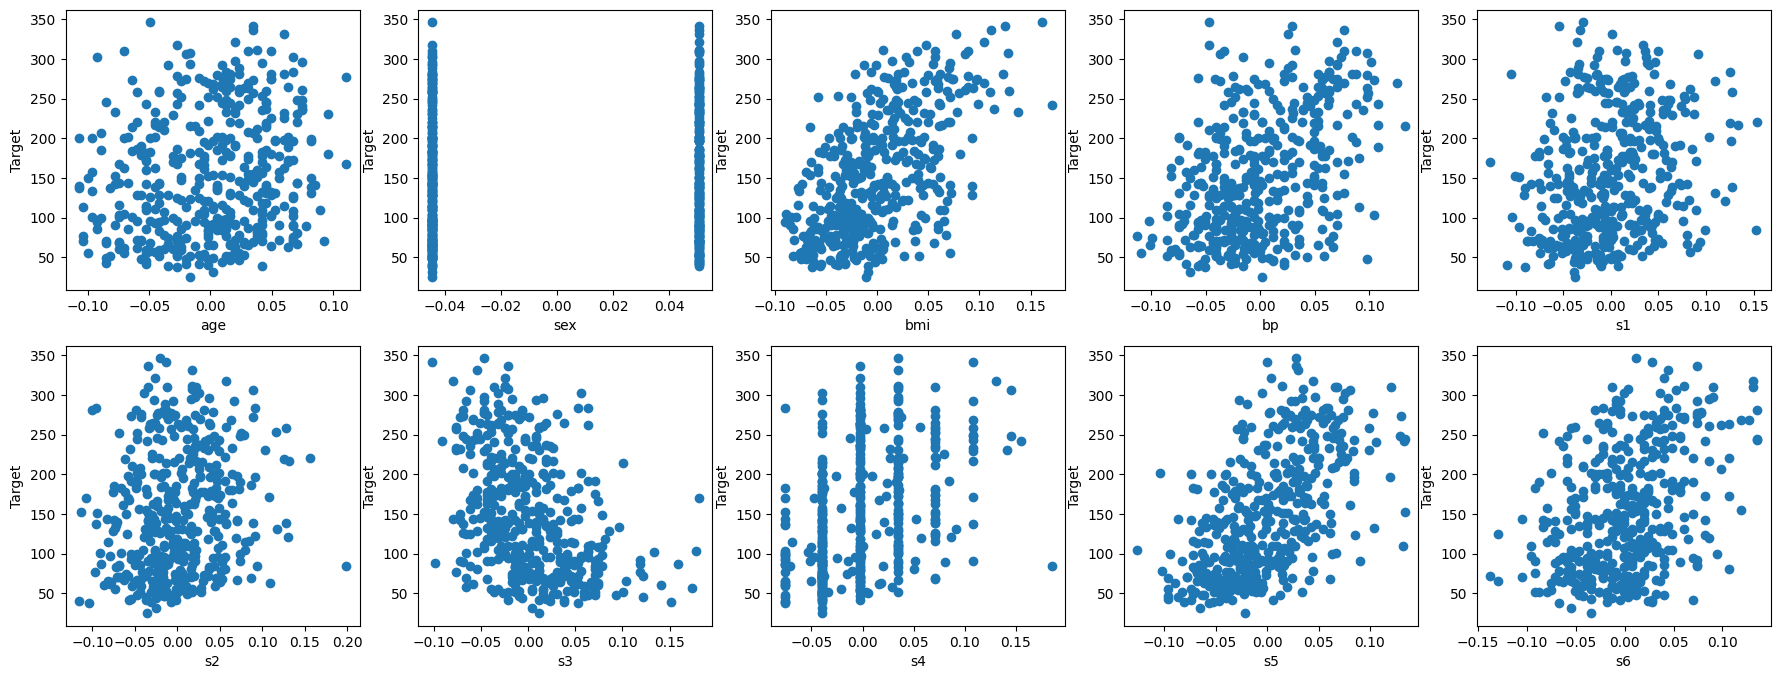

In [ ]:
# Scatter plot feature wise
fig = plt.figure(figsize=(22, 8))
y = df_DIA['target']
for i in range(10):
    col = df_DIA.columns[i]
    x = df_DIA[str(col)]
    fig.add_subplot(2, 5, i+1)
    plt.scatter(x, y)
    plt.xlabel(str(col))
    plt.ylabel('Target')

In [ ]:
df_X = df_DIA.drop(columns = 'target')

In [ ]:
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df2, test_size=0.2)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# X_train = np.array(df_train_data)
# y_train = np.array(df2)

Calculating $\Theta_{mle}$ using $(X^TX)^{-1}Xy$ i.e the normal equation

In [ ]:
X_dagger = np.dot(np.linalg.pinv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train))
theta_mle = np.dot(X_dagger, y_train)
y_non_grad_pred = np.dot(X_train, theta_mle)
print(y_non_grad_pred[:5])

[[ 31.67339966]
 [ 52.1055738 ]
 [ 49.73556398]
 [-62.52459077]
 [ 24.51277436]]


Learning $\Theta$ using gradient descent algorithm from scratch

In [ ]:
# Function to calculate cost
def compute_cost(X, y, theta):
    J = 0
    m, n = X.shape                  # m: no of data, n: no of features
    y_hat = np.zeros([len(y)])

    for i in range(m):              # For every row
        y_hat[i] = np.dot(X[i], theta)  # every feature of ith row is multiplied to every weight
        error = y[i] - y_hat[i]
        J+= error**2
    #   J*=(1/2*m)
    J = math.sqrt(J)                # RMSE

    return J, y_hat

m, n = X_train.shape
theta = np.zeros(n)
total_cost, y_hat = compute_cost(X_train, y_train, theta)  # cost fn called for some randomly initialized weight vector and bias

In [ ]:
# Gradient descent algorithm for leaarning parameters
def grad_descent(X, y, y_hat, iteration, lr):
  m, n = X.shape
  itr = []
  J_itr = []

  theta = np.zeros(n)                   # theta vector is initialized to a 0 vector
  lr = lr                               # learning rate
  for k in range(iteration):
    cost, y_hat = compute_cost(X, y, theta)
    dJ_dw = np.zeros((n,))              # since weight is row vector dJ/dw is also a row vector of dim 1 x n
    for i in range(m):
        for j in range(n):
            dJ_dw[j] += (y_hat[i] - y[i]) * X[i, j]
    theta = theta - lr*(dJ_dw)

    itr.append(k)
    J_itr.append(cost)

  return theta, itr, J_itr, y_hat

iter = int(input("Enter the no. of iteration for which you want to run gradient descent: "))
theta, itr, J_list, y_hat = grad_descent(X_train, y_train, y_hat, iter, 0.01)

Enter the no. of iteration for which you want to run gradient descent: 10000


In [ ]:
print("Final cost is: ", J_list[-1])
print("Learned weight is: ", theta[-1])

Final cost is:  2992.033090339249
Learned weight is:  -18.574739295837592


Text(0, 0.5, 'Cost')

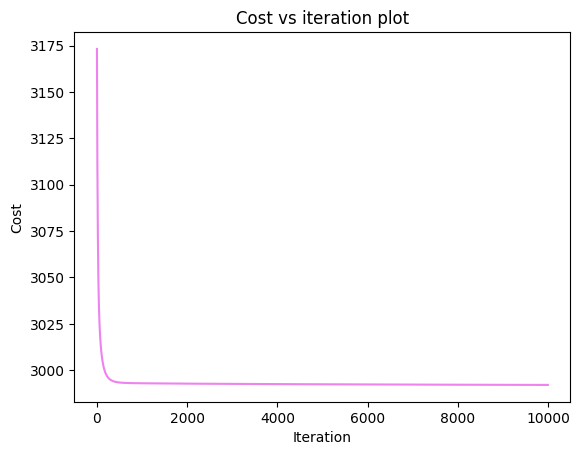

In [ ]:
#Plotting Cost vs # of iterations to check if gradient descent is converging
plt.plot(itr, J_list, color = "violet")
plt.title("Cost vs iteration plot")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [ ]:
y_pred_scratch = np.dot(X_test, theta)     # this one uses the weights and bias "from scratch code"
# y_pred_scratch = abs(y_pred_scratch)
print(y_pred_scratch[0:5])

[-20.04991462   3.67201279  99.03324054 -29.54474628 -16.20737393]


Linear regression using Sci-kit learn library

In [ ]:
# Using Sklearn library
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions[0:5])

[[118.4930478 ]
 [174.9287784 ]
 [248.91699777]
 [135.41476612]
 [130.94739632]]


In [ ]:
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

max_error(y_pred_scratch, predictions)
# r2_score(y_pred_scratch, predictions)

194.96974738215306

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred_scratch, y_test)/100)
print(mean_squared_error(predictions, y_test)/1000)

296.7803302430385
2.744096365072481


In [ ]:
# Why did I use RMSE instead of MSE as my loss function?
# Because I was getting a lesser loss function while using RMSE

In [ ]:
# def MSE(y_predicted, y_true):
#     error = (1/len(y_true)) * np.sum((y_true - y_predicted)**2)
#     return error

# e1 = MSE(predictions, y_train)
# e2 = MSE(y_pred_scratch, y_train)
# e3 = MSE(y_non_grad_pred, y_train)

# print(e1, e2, e3)

2859.6903987680657 14187698.24691986 26004.287402310347


####4. Naive Bayes Classification

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
col = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df_iris = pd.read_csv('iris.data', names = col)

--2023-02-09 07:04:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2023-02-09 07:04:05 (166 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
df_iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


EDA on Iris dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


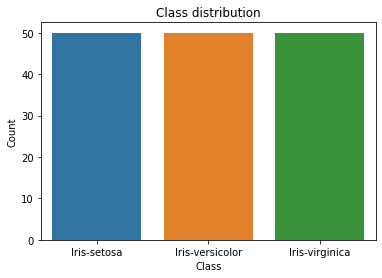

In [ ]:
sns.countplot(df_iris['class']).set_title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

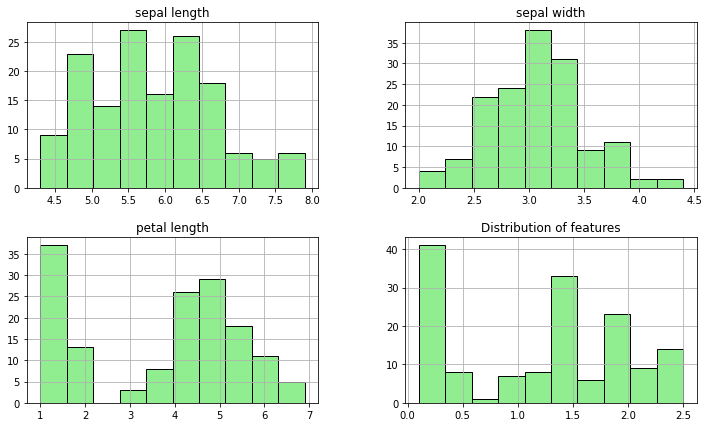

In [ ]:
df_iris.hist(figsize=(12,7), color = "lightgreen", ec="black")
plt.title('Distribution of features')
plt.show()
# plt.ylabel('count')

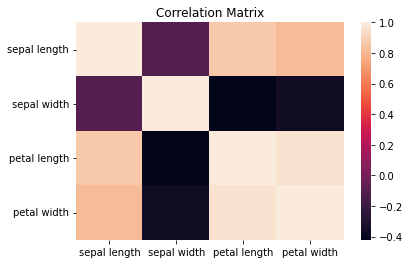

In [ ]:
plt.title('Correlation Matrix')
sns.heatmap(df_iris.corr())

In [ ]:
# We can see from the heatmap that a lot of features are correlated with each other
# for eg petal length and petal wdth

In [ ]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("No of unique classes: ", len(np.unique(df_iris['class'])))
print("No of unique sepal length values: ", len(np.unique(df_iris['sepal length'])))
print("No of unique sepal width values: ", len(np.unique(df_iris['sepal width'])))
print("No of unique petal length values: ", len(np.unique(df_iris['petal length'])))
print("No of unique petal width values: ", len(np.unique(df_iris['petal width'])))

No of unique classes:  3
No of unique sepal length values:  35
No of unique sepal width values:  23
No of unique petal length values:  43
No of unique petal width values:  22


In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(df_iris['class'])
# df_iris['class'] = le.transform(df_iris['class'])

In [ ]:
df_iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Since the features are of non binary nature I have modeled the
Gaussian Naive Bayes where likelihood is mapped to gaussian distribution given by the equation:
P($x_i$ | y) = $\frac{1}{(2 pi σ)^{0.5}}$ exp(-($x_i$ - $μ$)$^2$ / 2 σ$^2$)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_iris, test_size=0.2)

X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:,:-1].values
Y_test = test_df.iloc[:,-1].values

In [ ]:
def predict(X, classes, parameters):
    predictions = []
    for sample in X:
        posteriors = []
        prior = []
        for class_i in classes:
            # print(class_i)
            prior.append(len(np.where(class_i == df_iris)[0])/len(df_iris))
            # print(prior)

            mean = parameters[class_i]["mean"]
            var = parameters[class_i]["var"]
            posterior = (np.exp(- (sample - mean)**2 / (2 * var))) / (np.sqrt(2 * np.pi * var))
            posteriors.append(np.prod(posterior))                                                   # for each sample posterior  = product of every feature in that jth sample
        predictions.append(classes[np.argmax(posteriors* np.array(prior))])
    # print(predictions)
    return predictions

In [ ]:
def Naive_Bayes(X, y, X_pred):
    classes = np.unique(y)
    parameters = {}
    for class_i in classes:                         # iterates over 3 classes
        class_indices = np.where(y == class_i)      # stores indices of the ith class
        X_class = X[class_indices]
        parameters[class_i] = {                     # stores mean and variance of each class as a key-key-value pair in 2D dict
            "mean": np.mean(X_class),
            "var": np.var(X_class)
        }

    # print(parameters)

    pred = predict(X_pred, classes, parameters)
    return pred

In [ ]:
predict_scratch = Naive_Bayes(X_train, y_train, X_test)
print(predict_scratch)

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor']


In [ ]:
# X_gb = df_iris.drop(['class'], axis = 1)
# y_gb = df_iris['class']

# X_gb = np.array(X_gb)
# y_gb = np.array(y_gb)

In [ ]:
# train_df_x = train.drop(['class'], axis=1)
# train_df_x

# train_df_y = train['class']

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gb = GaussianNB()
model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)

In [ ]:
print("Accuracy of predicted from scratch labels vs sklearn labels: ", (y_pred == predict_scratch).sum() / len(predict_scratch) * 100, "%")
print("Accuracy of predicted from scratch labels vs true labels: ", (Y_test == predict_scratch).sum() / len(predict_scratch) * 100, "%")
print("Accuracy of predicted from true labels vs sklearn labels: ", (Y_test == y_pred).sum() / len(predict_scratch) * 100, "%")

Accuracy of predicted from scratch labels vs sklearn labels:  83.33333333333334 %
Accuracy of predicted from scratch labels vs true labels:  86.66666666666667 %
Accuracy of predicted from true labels vs sklearn labels:  90.0 %


Since this is not a regression problem I have calculated accuracy between scratch, true and sklearn labels.

####5. K-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
data = pd.read_csv('bmd.csv')
X = data[['age']]
y = data['bmd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
data

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


In [ ]:
data.isnull().sum()

id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

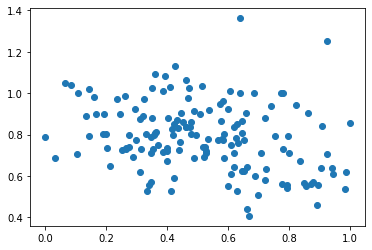

In [ ]:
def standard_scaling(X_sc):
    min = np.min(X_sc)
    max = np.max(X_sc)
    X_sc = (X_sc - (np.ones((X_sc.shape)) * min)) / (max - min)
    return X_sc

X_train = standard_scaling(X_train)
plt.scatter(X_train, y_train)

In [ ]:
# aa = [0.2, 0.1, 0.5, 0.4]
# np.argsort(aa)

array([1, 0, 3, 2])

To calculate euclidean dist of a 1D array since only 1 feature is taken

In [ ]:
def calc_euclidean_dist(x1, x2):
    dist = math.sqrt((x2-x1)**2)
    return dist

# calc_euclidean_dist(X[0], y[0], X[1], y[1])

In [ ]:
def KNN(X, y, x_pred, k):
    list_dist_coords = []
    for i in range(len(X)-1):
        list_dist_coords.append(calc_euclidean_dist(X[i], x_pred))
    # print(list_dist_coords)
    # list_dist_coords_sorted = np.sort(list_dist_coords)
    y_sorted = y[np.argsort(list_dist_coords)]
    k_nearest = y_sorted[:k]
    predicted = np.mean(k_nearest)
    return predicted

kk = []
for idx in range(len(X_test)):
    kk.append(KNN(X_train, y_train, X_test[idx], 5))
print(kk)

[0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001, 0.6529999980000001]


In [ ]:
#verifying with scikit learn KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[0.653 0.653 0.653 0.653 0.653 0.653 0.653 0.653 0.653 0.653 0.653 0.653
 0.653 0.653 0.653 0.653 0.653]


In [ ]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - np.mean(y_true))**2)
    score = 1 - (numerator/denominator)
    return score

In [ ]:
k_values = np.arange(5, 80, 5)
r2_scores = []
for k in k_values:
    # knn = KNeighborsRegressor(n_neighbors=k)
    # knn.fit(X_train, y_train)
    # y_pred = knn.predict(X_test)
    # score = r2_score(y_test, y_pred)

    y_knn_pred = []
    for idx in range(len(X_test)):
        y_knn_pred.append(KNN(X_train, y_train, X_test[idx], k))

    score = r2_score(y_test, y_knn_pred)

    r2_scores.append(score)
    print("k = ", k, ", R2 Score = ", score)

k =  5 , R2 Score =  -0.21608262699677128
k =  10 , R2 Score =  -0.0022626126031184413
k =  15 , R2 Score =  -0.12441156961752675
k =  20 , R2 Score =  -0.07822493631583849
k =  25 , R2 Score =  -0.11456147169029207
k =  30 , R2 Score =  -0.05413831029289051
k =  35 , R2 Score =  -0.031832206054261736
k =  40 , R2 Score =  -0.09245046249028843
k =  45 , R2 Score =  -0.05089075561255396
k =  50 , R2 Score =  -0.008328418477003163
k =  55 , R2 Score =  -0.007640267784196686
k =  60 , R2 Score =  -0.0016675231345661956
k =  65 , R2 Score =  -0.001069908557281174
k =  70 , R2 Score =  -0.0006300148169486874
k =  75 , R2 Score =  -0.00267697667761313


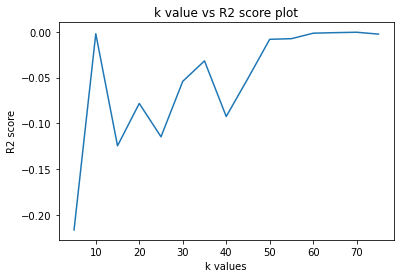

In [ ]:
plt.plot(k_values, r2_scores)
plt.xlabel('k values')
plt.ylabel('R2 score')
plt.title('k value vs R2 score plot')
plt.show()

In [ ]:
print("optimal value of K is: ", k_values[np.argmax(r2_scores)])

optimal value of K is:  70
